In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data generation
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)
data_x /= np.max(data_x)


In [3]:
data_x = np.hstack((np.ones_like(data_x), data_x))

In [4]:
order = np.random.permutation(len(data_x))
portion = 20
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]

In [5]:
def get_gradient(w, x, y):
    # calculate predicted y_pred = x.w
    #calculate error = y - y_pred
    #calculate mse = sum(error**2) / n
    #calculate gradient = error.x / n
    #return gradient,mse
    y_estimate = x.dot(w).flatten()
    error = (y.flatten() - y_estimate)
    mse = (1.0/len(x))*np.sum(np.power(error, 2))
    gradient = -(1.0/len(x)) * error.dot(x)
    return gradient, mse
    
    

Epoch: 0 - Error: 36.7128


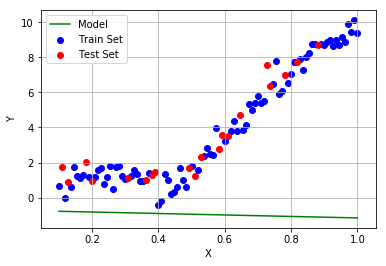

Epoch: 50 - Error: 1.8780


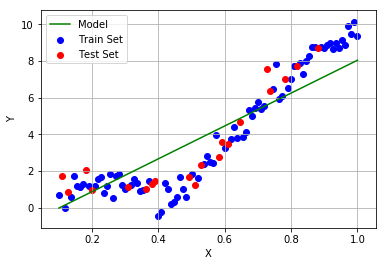

Epoch: 100 - Error: 1.4879


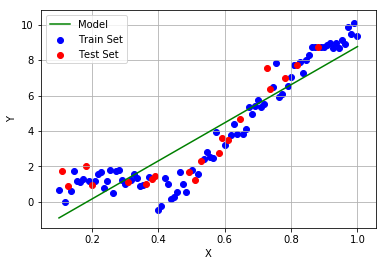

Epoch: 150 - Error: 1.4627


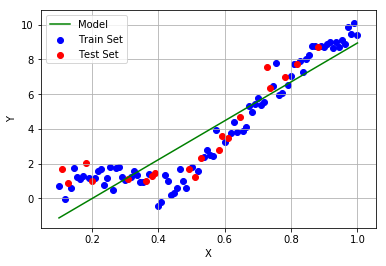

Epoch: 200 - Error: 1.4611


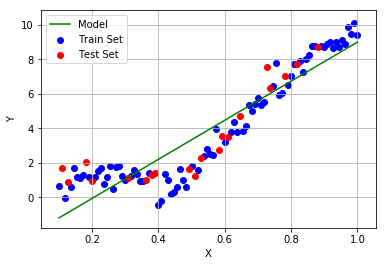

Epoch: 250 - Error: 1.4609


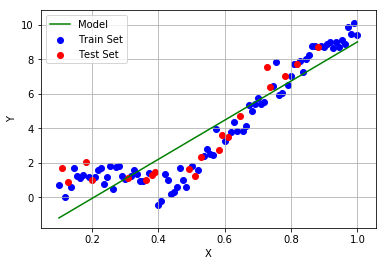

Epoch: 300 - Error: 1.4609


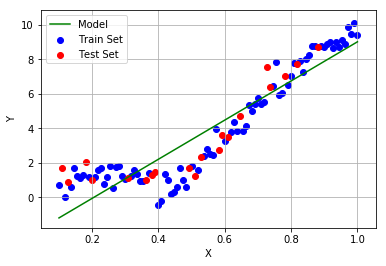

Epoch: 350 - Error: 1.4609


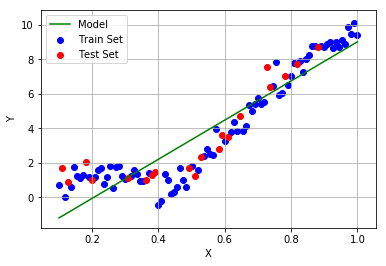

w = [-2.33653868 11.34730809]
Test Cost = 1.8553658164076143


In [6]:


#initialize the weights,learning rate,epochs
w = np.random.randn(2)
alpha = 0.5
epochs = 400

# Perform Gradient Descent

for i in range(epochs):
    #get the gradient,error from the function
    #get the new_w
    
    gradient, error = get_gradient(w, train_x, train_y)
    new_w = w - alpha * gradient
         
    # Print error every 50 iterations
    if i % 50 == 0:
        print ("Epoch: %d - Error: %.4f" %(i, error))
        plt.plot(data_x[:,1], data_x.dot(w), c='g', label='Model')
        plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
        plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
        plt.grid()
        plt.legend(loc='best')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()
    #update the weights 
    w = new_w

print ("w =",w)
print ("Test Cost =", get_gradient(w, test_x, test_y)[1])

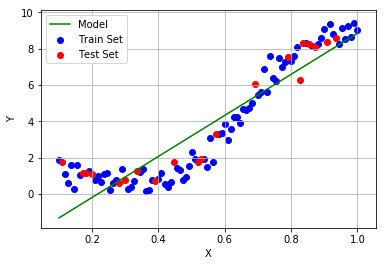

In [15]:


plt.plot(data_x[:,1], data_x.dot(w), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



/home/mehul/.local/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'label'
  s)


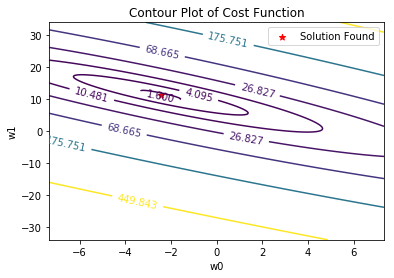

In [16]:
w1 = np.linspace(-w[1]*3, w[1]*3, 300)
w0 = np.linspace(-w[0]*3, w[0]*3, 300)
J_vals = np.zeros(shape=(w1.size, w0.size))

for t1, element in enumerate(w1):
    for t2, element2 in enumerate(w0):
        wT = [0, 0]
        wT[1] = element
        wT[0] = element2
        J_vals[t1, t2] = get_gradient(wT, train_x, train_y)[1]

plt.scatter(w[0], w[1], marker='*', color='r', s=40, label='Solution Found')
CS = plt.contour(w0, w1, J_vals, np.logspace(-10,10,50), label='Cost Function')
plt.clabel(CS, inline=1, fontsize=10)
plt.title("Contour Plot of Cost Function")
plt.xlabel("w0")
plt.ylabel("w1")
plt.legend(loc='best')
plt.show()